In [2]:
def inputParabol():
    """
    Функция для ввода данных, с помощью которого будет осуществляться метод парабол, описанный в пункте 3.2.2.
    
    Parameters
    ----------
    params: str
    Строка на вход с одной переменной, которая может быть задана любой русской или английской буквой
    F: str
    Функция в аналитическом виде в формате строки
    lim1: str
    Границы оптимизации через пробел в формате строки
    Final: dictionary
    Словарь со всеми переменными и функциями, которые ранее были введены
    
    """
   
    params = input('Введите название переменной: ')
    # params = params.split(' ')
    if len(params) > 1:
        print('Введено более одной переменной')
    elif len(params) < 1:
        print('Введено менее одной переменной')
    F = input('Функция в аналитическом виде :  ')
    lim1 = input(f'Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  ')
       
    lim1 = list(map(float, (lim1.split(' '))))
    Final = {'p1': params[0],
             'func': F,
             'lim1': lim1,}
    return Final

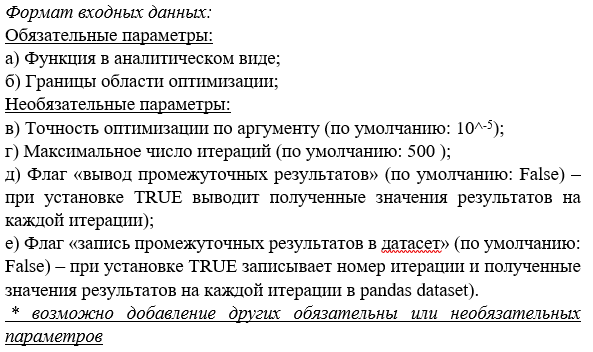

In [3]:
inputParabol()

Введите название переменной: x
Функция в аналитическом виде :  x**2
Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  -1 1


{'p1': 'x', 'func': 'x**2', 'lim1': [-1.0, 1.0]}

In [4]:
from sympy import *
def parabola(dictionary, eps=0.00001, maxk=500):
    
    """
    
    Функция, которая осуществляет алгоритм метода парабол, описанный
    
    Parameters
    ----------
    eps: float
    точность оптимизации
    maxk: int
    максимальное количество шагов алгоритма
    dictionary: dict
    Словарь, со всеми переменными, которые были заданы в функции ввода
    f: str
    Функция в аналитическом виде в формате строки
    lim1: list
    Границы области оптимизации
    
    Returns
    ---------
    x_: float
    Найденная точка минимума
    f_: float
    Значение функции в точке минимума
    k: int
    Количество итераций
    
    """
    
    # преобразование данных для символьного вычислнения
    import numpy as np
    from sympy.parsing.sympy_parser import parse_expr
    
    data = dictionary
    f = data['func']
    f = parse_expr(f)
    p1 = data['p1']
    x = Symbol(p1)
    lim1 = data['lim1']
    
    # подбор тройки чисел
    o = np.linspace(lim1[0], lim1[1], 1000)
    for i in range(1000):
        s = np.random.choice(o, size=3, replace=False)
        s = sorted(s)
        #print(s) - варианты подборов тройки чисел
        if (f.subs(x, s[0]) >= f.subs(x, s[1])) and (f.subs(x, s[2]) >= f.subs(x, s[1])):
            x1, x2, x3 = s[0], s[1], s[2]
            f1, f2, f3 = f.subs(x, s[0]), f.subs(x, s[1]), f.subs(x, s[2])
            break
            
    if not((f.subs(x,s[0]) >= f.subs(x,s[1])) and (f.subs(x,s[2])>= f.subs(x,s[1]))):
        print('Удачную тройку чисел найти не удалось')
    else:
        xr=10
        #eps=0.00001
        delta=100
        k=0
        while delta>eps and k<maxk:
            k+=1
            a0 = f1
            a1 = (f2-f1)/(x2-x1)
            a2 = ((f3-f1)/(x3-x1) - (f2-f1)/(x2-x1))/(x3-x2)
            x_ = 0.5*(x1 + x2 - a1/a2)
            f_ = f.subs(x, x_)
            delta=abs(x_ - xr)
            if x_>x1 and x_<x2 and f_<f1 and f_>f2:
                xr=x_
                x1=x_
                f1=f_
            elif x_>x1 and x_<x2 and f_<f2:
                xr=x_
                x3=x2
                f3=f2
                x2=x_
                f2=f_
            elif x_>x2 and x_<x3 and f_<f2:
                xr=x_
                x1=x2
                f1=f2
                x2=x_
                f2=f_
            elif x_>x2 and x_<x3 and f_<f3 and f_>f2:
                xr=x_
                x3=x_
                f3=f_
    if k==maxk:
        print('1 - достигнуто максимальное количество итераций')
    else:
        print('0 - найдено значение с заданной точностью')
        print(f'Экстремум функции на данном отрезке находится в точке ({x_}; {f_})')
        print(f'Количество итераций = {k}')
        print(f'Дельта = {delta}, {delta} < {eps}')
        

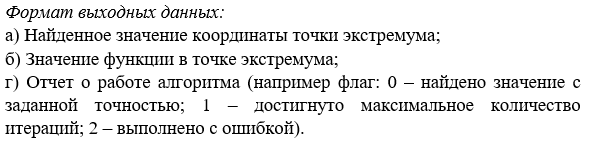

In [ ]:
# Далее - 5 тестов из ТЗ

In [44]:
parabola(inputParabol()) # 1 тест

Введите название переменной: x
Функция в аналитическом виде :  -5*x**5+4*x**4-12*x**3+11*x**2-2*x+1
Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  -0.5 0.5
[-0.3718718718718719, -0.0955955955955956, 0.23773773773773776]
[-0.40290290290290287, -0.2047047047047047, 0.1636636636636637]
[-0.3508508508508509, -0.29479479479479476, 0.06756756756756754]
[-0.30680680680680683, 0.09759759759759756, 0.35285285285285284]
Экстремум функции есть точка 0.109860807701440
Значение функции в точке экстремума равно 0.897632971901958
Delta равна 1.66485553156070e-6
Количество итераций равно 6


In [47]:
parabola(inputParabol()) # 2 тест

Введите название переменной: x
Функция в аналитическом виде :  (ln(x-2))**2 + (ln(10-x))**2-x**(0.2)
Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  6.6 9.9
[7.706606606606607, 7.9411411411411414, 8.951951951951951]
Экстремум функции есть точка 8.50158074623271
Значение функции в точке экстремума равно 2.13383834166986
Delta равна 5.25783823057679e-6
Количество итераций равно 17


In [50]:
parabola(inputParabol()) # 3 тест

Введите название переменной: x
Функция в аналитическом виде :  -3*x*sin(0.75*x)+exp(-2*x)
Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  0 6.28
[1.9550350350350352, 2.9922722722722725, 4.632992992992993]
Экстремум функции есть точка 2.70647473569400
Значение функции в точке экстремума равно -7.27435797007172
Delta равна 8.38707724915011e-6
Количество итераций равно 7


In [51]:
parabola(inputParabol()) # 4 тест

Введите название переменной: x
Функция в аналитическом виде :  exp(3*x)+5*exp(-2*x)
Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  0 1
[0.1981981981981982, 0.4014014014014014, 0.7497497497497497]
[0.44544544544544545, 0.8738738738738738, 0.9619619619619619]
[0.0890890890890891, 0.46146146146146144, 0.7277277277277278]
[0.02002002002002002, 0.39039039039039036, 0.7157157157157157]
Экстремум функции есть точка 0.240793820804966
Значение функции в точке экстремума равно 5.14834042140356
Delta равна 4.58834804117902e-6
Количество итераций равно 7


In [52]:
parabola(inputParabol()) # 5 тест

Введите название переменной: x
Функция в аналитическом виде :  0.2*x*log(x)+x*(x-2.3)**2
Выбранный отрезок [a,b] через пробел (на нём функция должна быть непрерывной и унимодальной) :  0.5 2.5
[1.8713713713713713, 2.2977977977977977, 2.3578578578578577]
Экстремум функции есть точка 2.21745109867495
Значение функции в точке экстремума равно 0.368287577875067
Delta равна 7.10776172141436e-6
Количество итераций равно 6
